### Rede Neural MultiClasse

https://archive.ics.uci.edu/ml/datasets/iris

In [11]:
#!pip install keras

In [10]:
#pip install tensorflow

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.utils import np_utils

In [2]:
base = pd.read_csv('iris.csv')

In [3]:
base.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
base.shape

(150, 5)

In [5]:
base['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
X = base.drop(['class'], axis=1)
y = base['class']

In [7]:
print(X)
print(y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: objec

In [8]:
#Transformar em número
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(y)
print(classe)
classe_dummy = np_utils.to_categorical(classe)
#iris setosa     1 0 0
#iris virginica  0 1 0
#iris versicolor 0 0 1
print("##################")
print(classe_dummy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
##################
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0

In [9]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento,classe_teste = train_test_split(X, classe_dummy, test_size=0.30)

In [18]:
#categorical_crossentropy para trabalhar com problemas de classificação multiclasse
# ENT SAÍDA
# 4 + 3     /  2 = 3,5 => 3  
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 3, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])

In [19]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10,
                  epochs = 100)

Epoch 1/100
11/11 [==============================] - 0s 998us/step - loss: 1.5301 - categorical_accuracy: 0.3048
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 1.3576 - categorical_accuracy: 0.3048
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 1.2295 - categorical_accuracy: 0.3048
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 1.1237 - categorical_accuracy: 0.3048
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 1.0333 - categorical_accuracy: 0.3619
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 0.9567 - categorical_accuracy: 0.5714
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9082 - categorical_accuracy: 0.3810
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8644 - categorical_accuracy: 0.4762
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8374 - categorical_accuracy: 0.6857

11/11 [==============================] - 0s 1ms/step - loss: 0.3355 - categorical_accuracy: 0.9714
Epoch 75/100
11/11 [==============================] - 0s 995us/step - loss: 0.3344 - categorical_accuracy: 0.9619
Epoch 76/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3310 - categorical_accuracy: 0.9619
Epoch 77/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3283 - categorical_accuracy: 0.9619
Epoch 78/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3258 - categorical_accuracy: 0.9619
Epoch 79/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3229 - categorical_accuracy: 0.9619
Epoch 80/100
11/11 [==============================] - 0s 997us/step - loss: 0.3209 - categorical_accuracy: 0.9619
Epoch 81/100
11/11 [==============================] - 0s 949us/step - loss: 0.3186 - categorical_accuracy: 0.9714
Epoch 82/100
11/11 [==============================] - 0s 1ms/step - loss: 0.3168 - categorical_accuracy: 0.9810

In [31]:
base['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
resultado = classificador.evaluate(previsores_teste, classe_teste)
print(f'Resultado = {resultado}')
previsoes = classificador.predict(previsores_teste)
print(f'Previsões = {previsoes[:5]}')
previsoes = (previsoes > 0.5)
print(previsoes[:5])

2/2 [==============================] - 0s 2ms/step - loss: 0.2705 - categorical_accuracy: 0.9778
Resultado = [0.2705093026161194, 0.9777777791023254]
Previsões = [[2.4944663e-02 7.2313166e-01 2.5192365e-01]
 [9.8950058e-01 1.0112265e-02 3.8713662e-04]
 [9.8551846e-01 1.3912585e-02 5.6897535e-04]
 [3.0300287e-03 3.1706470e-01 6.7990535e-01]
 [5.6402326e-02 7.2525054e-01 2.1834716e-01]]
[[False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False  True False]]


### Matriz de confusão 

In [29]:
import numpy as np
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(previsoes2, classe_teste2)
print(matriz)

[[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]


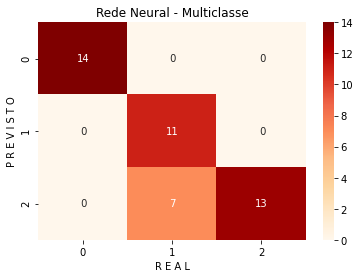

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(previsoes2,classe_teste2), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Multiclasse')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. 

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf

In [55]:
def criar_rede():
    classificador = Sequential()
    classificador.add(Dense(units = 4, kernel_initializer = 'random_uniform',activation = 'relu', input_dim = 4))
    classificador.add(Dense(units = 4, activation = 'relu'))
    classificador.add(Dense(units = 3, activation = 'softmax'))
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                          metrics = ['categorical_accuracy'])
    return classificador

In [56]:
classificador = KerasClassifier(build_fn = criar_rede,
                                epochs = 200,
                                batch_size = 10)

In [53]:
resultados = cross_val_score(estimator = classificador,
                             X = X, y = y,
                             cv = 10, scoring = 'accuracy')

Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 1.0895 - categorical_accuracy: 0.3704
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0869 - categorical_accuracy: 0.3704
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0840 - categorical_accuracy: 0.3704
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0812 - categorical_accuracy: 0.3704
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0783 - categorical_accuracy: 0.3704
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0754 - categorical_accuracy: 0.3704
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0721 - categorical_accuracy: 0.3704
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0689 - categorical_accuracy: 0.3704
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0662 - categorical_accuracy: 0.3704
E

14/14 [==============================] - 0s 2ms/step - loss: 0.3771 - categorical_accuracy: 0.9778
Epoch 147/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3731 - categorical_accuracy: 0.9778
Epoch 148/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3703 - categorical_accuracy: 0.9778
Epoch 149/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3647 - categorical_accuracy: 0.9704
Epoch 150/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3620 - categorical_accuracy: 0.9630
Epoch 151/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3568 - categorical_accuracy: 0.9778
Epoch 152/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3523 - categorical_accuracy: 0.9704
Epoch 153/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3483 - categorical_accuracy: 0.9778
Epoch 154/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3442 - categorical_accuracy: 0.97

14/14 [==============================] - 0s 2ms/step - loss: 0.6088 - categorical_accuracy: 0.6593
Epoch 92/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6076 - categorical_accuracy: 0.6667
Epoch 93/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6064 - categorical_accuracy: 0.6667
Epoch 94/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6052 - categorical_accuracy: 0.6667
Epoch 95/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6040 - categorical_accuracy: 0.6593
Epoch 96/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6029 - categorical_accuracy: 0.6593
Epoch 97/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6017 - categorical_accuracy: 0.6593
Epoch 98/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6006 - categorical_accuracy: 0.6593
Epoch 99/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5996 - categorical_accuracy: 0.6519
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 0.8870 - categorical_accuracy: 0.8444
Epoch 37/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8786 - categorical_accuracy: 0.8148
Epoch 38/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8709 - categorical_accuracy: 0.7778
Epoch 39/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8633 - categorical_accuracy: 0.7333
Epoch 40/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8561 - categorical_accuracy: 0.6889
Epoch 41/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8494 - categorical_accuracy: 0.6815
Epoch 42/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8425 - categorical_accuracy: 0.6815
Epoch 43/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8360 - categorical_accuracy: 0.6741
Epoch 44/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8297 - categorical_accuracy: 0.6815
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 0.5210 - categorical_accuracy: 0.9704
Epoch 182/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5186 - categorical_accuracy: 0.9704
Epoch 183/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5160 - categorical_accuracy: 0.9704
Epoch 184/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5135 - categorical_accuracy: 0.9778
Epoch 185/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5109 - categorical_accuracy: 0.9778
Epoch 186/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5085 - categorical_accuracy: 0.9778
Epoch 187/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5061 - categorical_accuracy: 0.9630
Epoch 188/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5032 - categorical_accuracy: 0.9704
Epoch 189/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5004 - categorical_accuracy: 0.97

14/14 [==============================] - 0s 2ms/step - loss: 0.5451 - categorical_accuracy: 0.7037
Epoch 128/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5440 - categorical_accuracy: 0.7037
Epoch 129/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5429 - categorical_accuracy: 0.7037
Epoch 130/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5418 - categorical_accuracy: 0.7037
Epoch 131/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5408 - categorical_accuracy: 0.7037
Epoch 132/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5396 - categorical_accuracy: 0.7037
Epoch 133/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5385 - categorical_accuracy: 0.7037
Epoch 134/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5375 - categorical_accuracy: 0.7037
Epoch 135/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5364 - categorical_accuracy: 0.70

14/14 [==============================] - 0s 2ms/step - loss: 0.4856 - categorical_accuracy: 0.9778
Epoch 73/200
14/14 [==============================] - 0s 3ms/step - loss: 0.4795 - categorical_accuracy: 0.9778
Epoch 74/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4753 - categorical_accuracy: 0.9852
Epoch 75/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4640 - categorical_accuracy: 0.9852
Epoch 76/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4585 - categorical_accuracy: 0.9852
Epoch 77/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4500 - categorical_accuracy: 0.9852
Epoch 78/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4435 - categorical_accuracy: 0.9852
Epoch 79/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4361 - categorical_accuracy: 0.9852
Epoch 80/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4294 - categorical_accuracy: 0.9852
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 1.0112 - categorical_accuracy: 0.6889
Epoch 17/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0001 - categorical_accuracy: 0.7333
Epoch 18/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9872 - categorical_accuracy: 0.7407
Epoch 19/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9741 - categorical_accuracy: 0.7407
Epoch 20/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9617 - categorical_accuracy: 0.7407
Epoch 21/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9474 - categorical_accuracy: 0.7407
Epoch 22/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9334 - categorical_accuracy: 0.7407
Epoch 23/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9192 - categorical_accuracy: 0.7407
Epoch 24/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9038 - categorical_accuracy: 0.7407
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 0.3538 - categorical_accuracy: 0.9778
Epoch 162/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3500 - categorical_accuracy: 0.9778
Epoch 163/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3466 - categorical_accuracy: 0.9778
Epoch 164/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3435 - categorical_accuracy: 0.9704
Epoch 165/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3399 - categorical_accuracy: 0.9778
Epoch 166/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3367 - categorical_accuracy: 0.9778
Epoch 167/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3332 - categorical_accuracy: 0.9778
Epoch 168/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3297 - categorical_accuracy: 0.9778
Epoch 169/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3262 - categorical_accuracy: 0.97

Epoch 34/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7709 - categorical_accuracy: 0.7037
Epoch 35/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7527 - categorical_accuracy: 0.7037
Epoch 36/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7358 - categorical_accuracy: 0.7037
Epoch 37/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7197 - categorical_accuracy: 0.7037
Epoch 38/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7047 - categorical_accuracy: 0.7037
Epoch 39/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6908 - categorical_accuracy: 0.7037
Epoch 40/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6778 - categorical_accuracy: 0.7037
Epoch 41/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6658 - categorical_accuracy: 0.7037
Epoch 42/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6546 - categorical_accuracy:

14/14 [==============================] - 0s 2ms/step - loss: 0.3314 - categorical_accuracy: 0.9704
Epoch 108/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3280 - categorical_accuracy: 0.9704
Epoch 109/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3232 - categorical_accuracy: 0.9704
Epoch 110/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3197 - categorical_accuracy: 0.9704
Epoch 111/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3168 - categorical_accuracy: 0.9704
Epoch 112/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3135 - categorical_accuracy: 0.9704
Epoch 113/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3083 - categorical_accuracy: 0.9704
Epoch 114/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3040 - categorical_accuracy: 0.9704
Epoch 115/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3035 - categorical_accuracy: 0.97

14/14 [==============================] - 0s 2ms/step - loss: 0.8332 - categorical_accuracy: 0.7407
Epoch 53/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8237 - categorical_accuracy: 0.7407
Epoch 54/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8149 - categorical_accuracy: 0.7407
Epoch 55/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8064 - categorical_accuracy: 0.7407
Epoch 56/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7979 - categorical_accuracy: 0.7407
Epoch 57/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7896 - categorical_accuracy: 0.7407
Epoch 58/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7813 - categorical_accuracy: 0.7407
Epoch 59/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7739 - categorical_accuracy: 0.7407
Epoch 60/200
14/14 [==============================] - 0s 2ms/step - loss: 0.7658 - categorical_accuracy: 0.7407
Epoch

14/14 [==============================] - 0s 1ms/step - loss: 0.4702 - categorical_accuracy: 0.7407
Epoch 198/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4697 - categorical_accuracy: 0.7407
Epoch 199/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4693 - categorical_accuracy: 0.7407
Epoch 200/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4688 - categorical_accuracy: 0.7407
Epoch 1/200
14/14 [==============================] - 2s 2ms/step - loss: 1.1283 - categorical_accuracy: 0.3704
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1209 - categorical_accuracy: 0.3704
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1160 - categorical_accuracy: 0.3704
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1114 - categorical_accuracy: 0.3704
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 1.1077 - categorical_accuracy: 0.3704
Epoch 6

14/14 [==============================] - 0s 2ms/step - loss: 0.5285 - categorical_accuracy: 0.7407
Epoch 143/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5271 - categorical_accuracy: 0.7407
Epoch 144/200
14/14 [==============================] - 0s 1ms/step - loss: 0.5258 - categorical_accuracy: 0.7407
Epoch 145/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5244 - categorical_accuracy: 0.7407
Epoch 146/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5232 - categorical_accuracy: 0.7407
Epoch 147/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5218 - categorical_accuracy: 0.7407
Epoch 148/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5204 - categorical_accuracy: 0.7407
Epoch 149/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5192 - categorical_accuracy: 0.7407
Epoch 150/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5181 - categorical_accuracy: 0.74

14/14 [==============================] - 0s 2ms/step - loss: 0.5381 - categorical_accuracy: 0.7407
Epoch 88/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5364 - categorical_accuracy: 0.7407
Epoch 89/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5348 - categorical_accuracy: 0.7407
Epoch 90/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5333 - categorical_accuracy: 0.7407
Epoch 91/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5316 - categorical_accuracy: 0.7407
Epoch 92/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5301 - categorical_accuracy: 0.7407
Epoch 93/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5286 - categorical_accuracy: 0.7407
Epoch 94/200
14/14 [==============================] - 0s 1ms/step - loss: 0.5273 - categorical_accuracy: 0.7407
Epoch 95/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5258 - categorical_accuracy: 0.7407
Epoch

In [54]:
media = resultados.mean()
desvio = resultados.std()
print(media)
print(desvio)

0.6666666666666667
0.4412104562073146


### Referências
* Perceptron. Disponível em: https://www.deeplearningbook.com.br/?s=Perceptron. Acesso em 31/10/2022.
* Formação Cientista de Dados com Python e R. Disponível em:< https://www.udemy.com/course/cientista-de-dados/>. Acesso em 01/02/2020;
* Deep Learning com Python de A a Z - O Curso Completo. Disponível em:https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10715306?start=57#overview. Acesso em 31/10/2022.
* UCI - machine learning repositor. Disponível em:https://archive.ics.uci.edu/ml/index.php. Acesso em 31/10/2022.
* Keras. Disponível em: https://keras.io/. Acesso em 31/10/2022.